# Plant

In [2]:
import os, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D, Activation, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

/home/alexis/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/alexis/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/alexis/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/alexis/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [3]:
train_csv = pd.read_csv("train.csv", sep=",", encoding="utf-8")
train_csv.head(3)

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0


In [4]:
test_csv = pd.read_csv("test.csv", sep=",", encoding="utf-8")
test_csv.head(3)

,image_id
0,Test_0
1,Test_1
2,Test_2


In [5]:
df_train, df_val = train_test_split(train_csv, random_state=0, test_size=0.2)
print(len(df_train), len(df_val))

1456 365


In [6]:
df_train.head(3)

,image_id,healthy,multiple_diseases,rust,scab
227,Train_227,1,0,0,0
811,Train_811,1,0,0,0
1422,Train_1422,0,0,1,0


In [7]:
def resize_images(df):
    
    images = []
    one_hot = []

    size = (128,128)
    
    for i , file in enumerate(df.image_id):
        tmp = []
        img_data = Image.open("images"+"/"+file+".jpg")
        img = img_data.resize(size)
        img = np.array(img) /255
        images.append(img)
        tmp.append(df.iloc[i]["healthy"])
        tmp.append(df.iloc[i]["multiple_diseases"])
        tmp.append(df.iloc[i]["rust"])
        tmp.append(df.iloc[i]["scab"])
        one_hot.append(tmp)
        
    return np.array(images),np.array(one_hot)

In [8]:
x_train,y_train = resize_images(df_train)
x_val,y_val = resize_images(df_val)

In [9]:
def resize_images_test(df):
    
    images = []
    one_hot = []

    size = (128,128)
    
    for i , file in enumerate(df.image_id):
        tmp = []
        img_data = Image.open("images"+"/"+file+".jpg")
        img = img_data.resize(size)
        img = np.array(img) /255
        images.append(img)
        
    return np.array(images)

In [10]:
x_test = resize_images_test(test_csv)

## Show train

/home/alexis/.local/lib/python3.6/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


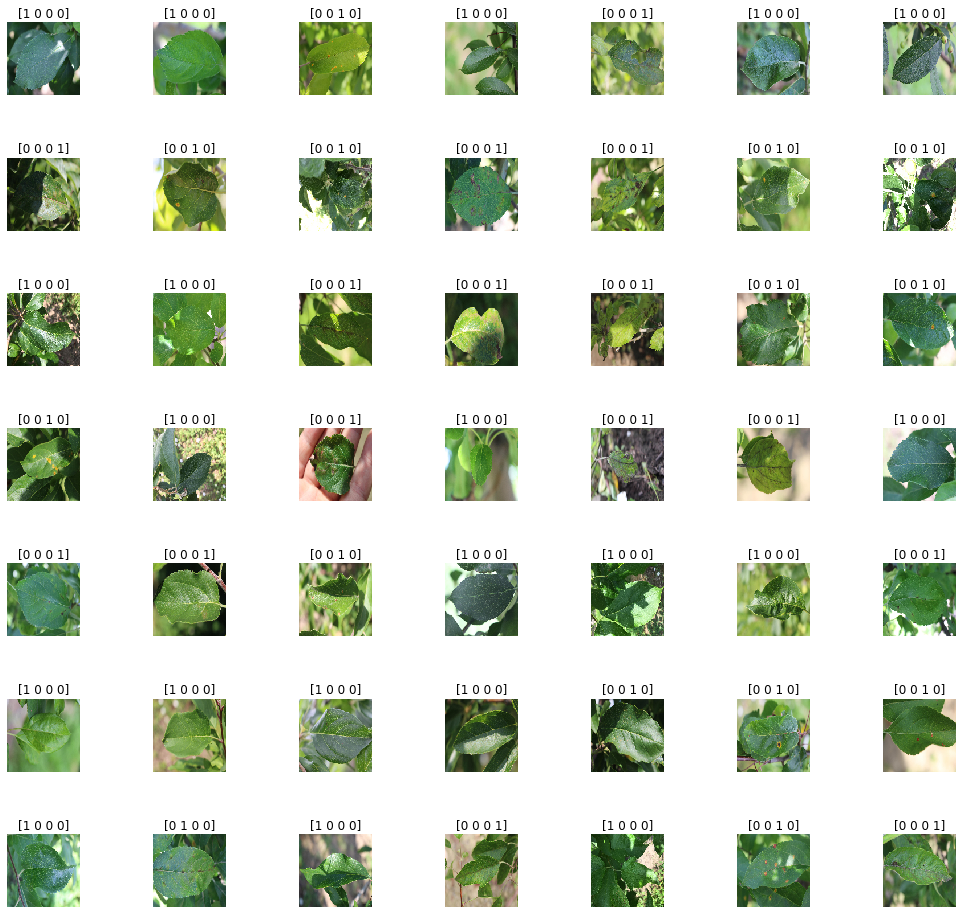

In [11]:
fig,axes = plt.subplots(7, 7, figsize = (17, 17))
axes = axes.ravel()

for i in np.arange(0, 7*7):
    axes[i].imshow(x_train[i])
    axes[i].set_title(y_train[i])
    axes[i].axis('off')
    plt.subplots_adjust(wspace = 1)

## Create Model

In [12]:
model = models.Sequential()
    
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', input_shape=(128, 128, 3), activation='relu'))
    
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='SAME', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
    
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='SAME', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
   
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(5, 5), padding='SAME', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 32)        2

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
checkpoint_path = "model/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [18]:
image_generator = ImageDataGenerator(rotation_range=360, 
                        width_shift_range=0.2,
                        height_shift_range=0.2, 
                        zoom_range=0.2,
                        horizontal_flip=True, 
                        vertical_flip=True)

image_generator.fit(x_train)

## Train model

In [ ]:
model.fit(image_generator.flow(x_train, y_train, batch_size=32), epochs = 4, callbacks=[cp_callback], validation_data=(x_val, y_val))

Epoch 1/4


## Prediction on Test

In [17]:
predict = model.predict(x_test)
all_predict = np.ndarray(shape = (test_csv.shape[0],4),dtype = np.float32)
for i in range(0,test_csv.shape[0]):
    for j in range(0,4):
        if predict[i][j]==max(predict[i]):
            all_predict[i][j] = 1
        else:
            all_predict[i][j] = 0 

In [18]:
healthy = [y_test[0] for y_test in all_predict]
multiple_diseases = [y_test[1] for y_test in all_predict]
rust = [y_test[2] for y_test in all_predict]
scab = [y_test[3] for y_test in all_predict]

In [20]:
df = {'image_id':test_csv.image_id,'healthy':healthy,'multiple_diseases':multiple_diseases,'rust':rust,'scab':scab}

In [21]:
data = pd.DataFrame(df)
data.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,1.0,0.0,0.0,0.0
1,Test_1,1.0,0.0,0.0,0.0
2,Test_2,1.0,0.0,0.0,0.0
3,Test_3,1.0,0.0,0.0,0.0
4,Test_4,1.0,0.0,0.0,0.0


/home/alexis/.local/lib/python3.6/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


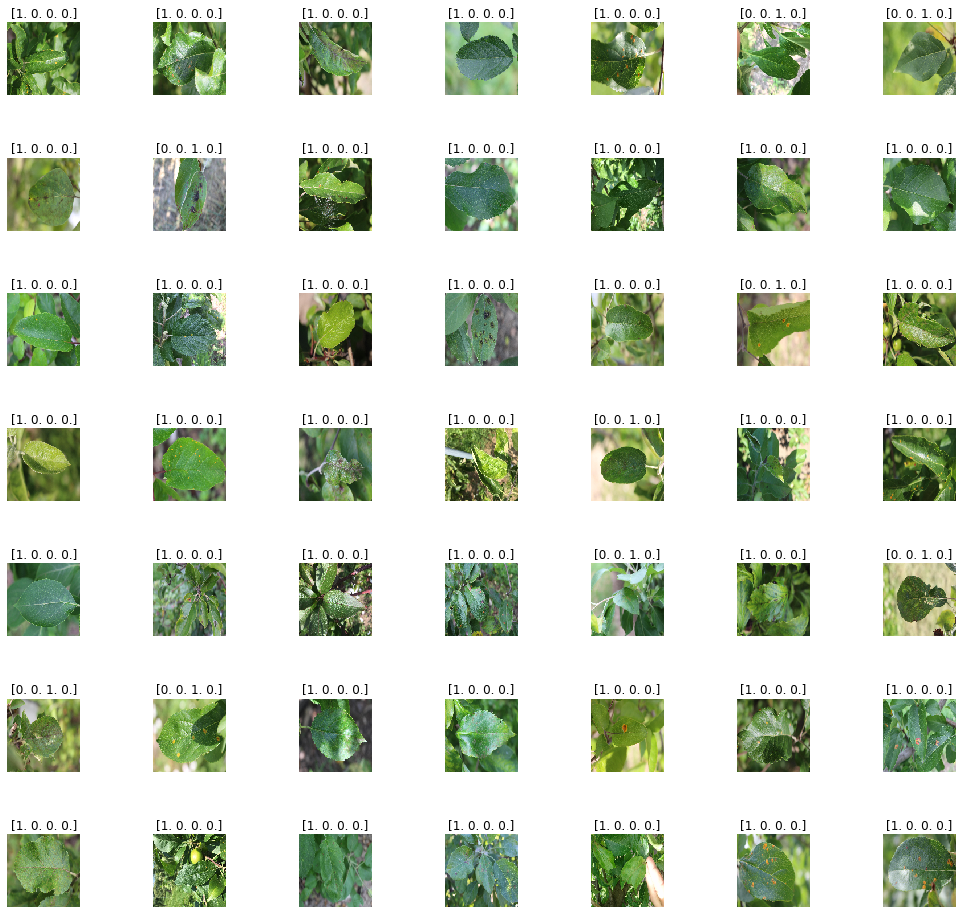

In [25]:
fig,axes = plt.subplots(7, 7, figsize = (17, 17))
axes = axes.ravel()

for i in np.arange(0, 7*7):
    axes[i].imshow(x_test[i])
    axes[i].set_title(all_predict[i])
    axes[i].axis('off')
    plt.subplots_adjust(wspace = 1)


## Save result for submission

In [26]:
data.to_csv('submission.csv',index = False)